# Titanic: Machine Learning from Disaster
1. Predict survival on the Titanic
2. Defining the problem statement
3. Collecting the data
4. Exploratory data analysis
5. Feature engineering
6. Modelling
5. Testing

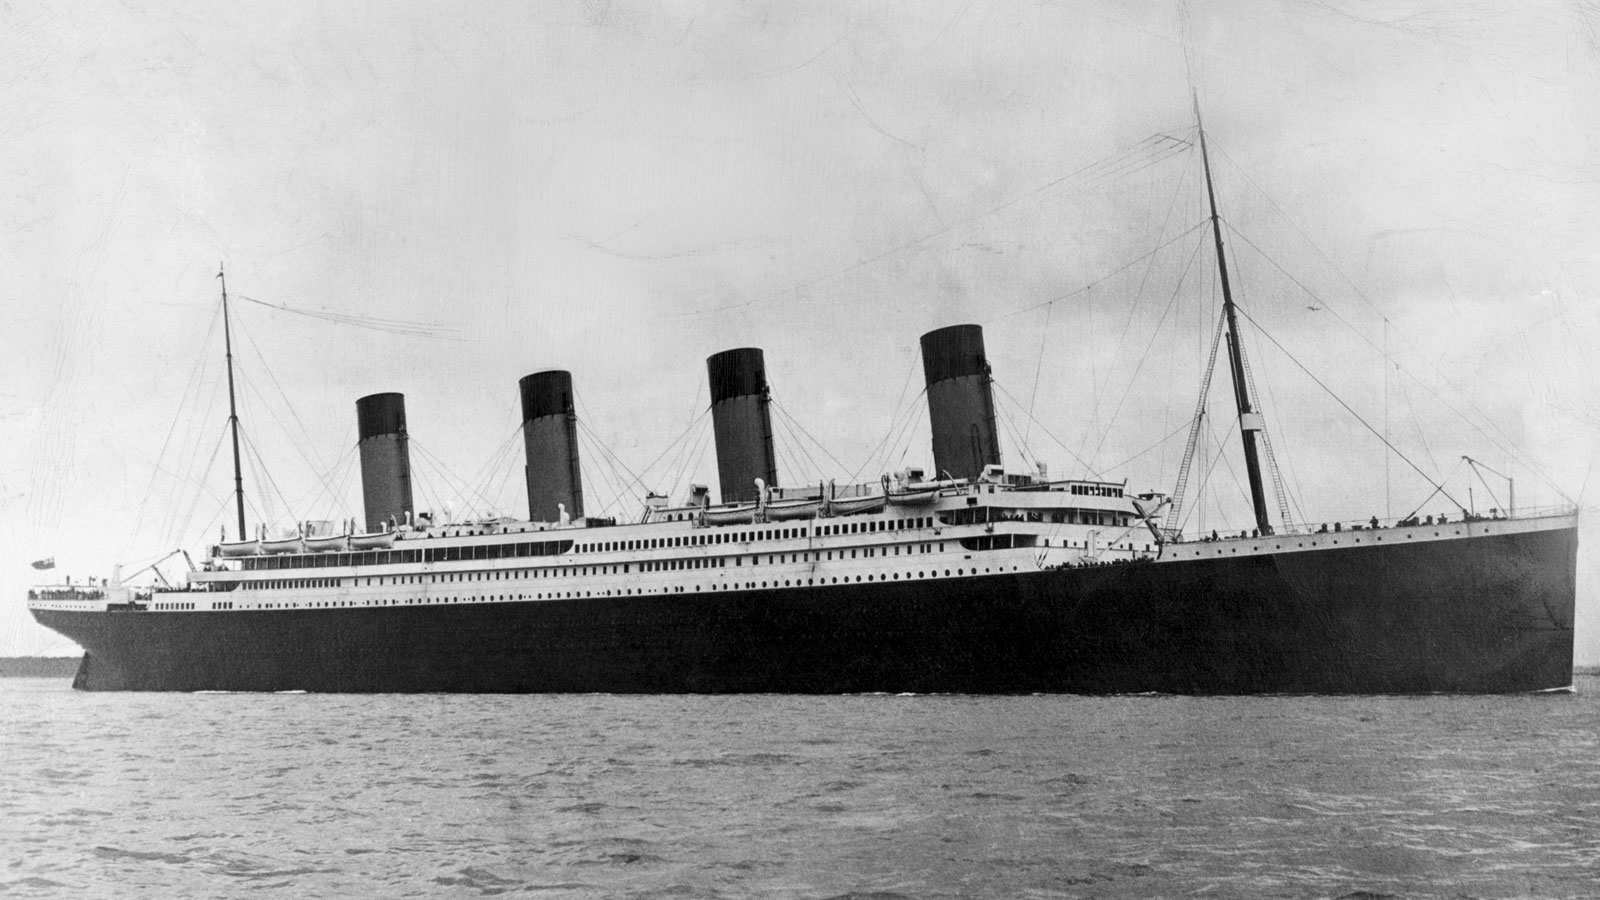

In [4]:
from IPython.display import Image
Image('https://cdn.britannica.com/79/4679-050-BC127236/Titanic.jpg')

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

# Data Collection


In [8]:
address = '/Users/gamashie/Documents/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/titanic-training-data.csv'
titanic = pd.read_csv(address)
titanic.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
#titanic_training.head()

# Exploratiory Data Analysis

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### VARIABLE DESCRIPTIONS

Survived - Survival (0 = No; 1 = Yes)<br>
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
Name - Name<br>
Sex - Sex<br>
Age - Age<br>
SibSp - Number of Siblings/Spouses Aboard<br>
Parch - Number of Parents/Children Aboard<br>
Ticket - Ticket Number<br>
Fare - Passenger Fare (British pound)<br>
Cabin - Cabin<br>
Embarked - Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)

### Checking that your target variable is binary

0    549
1    342
Name: Survived, dtype: int64

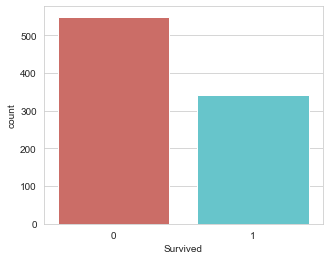

In [11]:
sns.countplot(x='Survived', data=titanic, palette='hls')
titanic.Survived.value_counts()

In [12]:
def barchart(feature):
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    perished = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,perished])
    df.index=['Survived', 'Perished']
    df.plot(kind='bar', stacked = True)

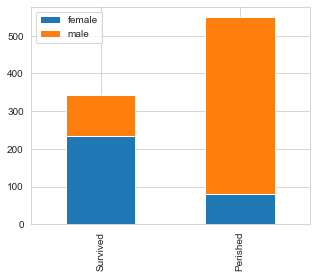

In [13]:
barchart('Sex')

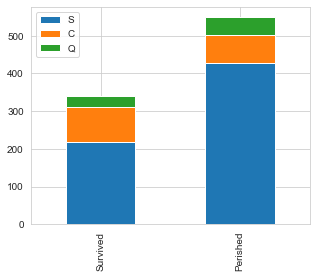

In [14]:
barchart('Embarked')

In [15]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Checking for missing values

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#check for duplicates in Name and ID
titanic.duplicated(subset=['PassengerId','Name'], keep=False).value_counts() 

False    891
dtype: int64

In [18]:
titanic.columns
df = titanic[['PassengerId','Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]

In [19]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


In [21]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


### Taking care of missing values
##### Dropping missing values
So let's just go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:
- Survived - This variable is obviously relevant.(Target Feature)
- Pclass - Does a passenger's class on the boat affect their survivability?
- Sex - Could a passenger's gender impact their survival rate?
- Age - Does a person's age impact their survival rate?
- SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probability
- Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probability
- Fare - Does the fare a person paid effect his survivability? Maybe - let's keep it.
- Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it.

What about a person's name, ticket number, and passenger ID number? They're irrelavant for predicting survivability. And as you recall, the cabin variable is almost all missing values, so we can just drop all of these.

In [22]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


### Imputing missing values

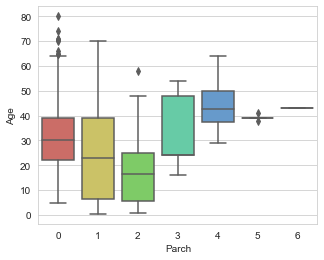

In [23]:
sns.boxplot(x='Parch', y='Age', data=df, palette='hls')

In [24]:
Parch_groups = df.groupby(df['Parch']).mean()
Parch_groups

,PassengerId,Pclass,Age,SibSp,Fare,Survived
Parch,,,,,,
0,445.255162,2.321534,32.178503,0.237463,25.586774,0.343658
1,465.110169,2.203390,24.422000,1.084746,46.778180,0.550847
2,416.662500,2.275000,17.216912,2.062500,64.337604,0.500000
3,579.200000,2.600000,33.200000,1.000000,25.951660,0.600000
4,384.000000,2.500000,44.500000,0.750000,84.968750,0.000000
5,435.200000,3.000000,39.200000,0.600000,32.550000,0.200000
6,679.000000,3.000000,43.000000,1.000000,46.900000,0.000000


In [25]:
df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [26]:
#dx = df
#dx.head()

In [27]:
#dx.Age.replace(np.nan,999, inplace = True)

In [28]:
df.Age.replace(np.nan,999, inplace = True)

df.loc[(df.Parch==0) & (df.Age==999), 'Age'] = 32
df.loc[(df.Parch==1) & (df.Age==999), 'Age'] = 24
df.loc[(df.Parch==2) & (df.Age==999), 'Age'] = 17
df.loc[(df.Parch==3) & (df.Age==999), 'Age'] = 33
df.loc[(df.Parch==4) & (df.Age==999), 'Age'] = 44
df.loc[(df.Parch==5) & (df.Age==999), 'Age'] = 39
df.loc[(df.Parch==6) & (df.Age==999), 'Age'] = 43



In [29]:
df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Survived       0
dtype: int64

In [30]:
##def age_approx(cols):
 #   Age = cols[0]
#    Parch = cols[1]
    
#    if pd.isnull(Age):
#        if Parch == 0:
#            return 32
#        elif Parch == 1:
#            return 24
#        elif Parch == 2:
#            return 17
#        elif Parch == 3:
#            return 33
#        elif Parch == 4:
#            return 45
#        else:
#            return 30
        
#    else:
#        return Age

In [31]:
#df['Age']= df[['Age', 'Parch']].apply(age_approx, axis=1)
#titanic_data.isnull().sum()

In [32]:
#Drop the rows with the missing (Embarked) values

df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
PassengerId    889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
Survived       889 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB
None


### Converting categorical variables to a dummy indicators

In [33]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#gender_cat = df['Sex']
#gender_encoded = label_encoder.fit_transform(gender_cat)
#gender_encoded[0:5]

df.loc[df.Sex=='male', 'Sex']=1
df.loc[df.Sex=='female', 'Sex']=0

In [34]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,S,0
1,2,1,0,38.0,1,0,71.2833,C,1
2,3,3,0,26.0,0,0,7.9250,S,1
3,4,1,0,35.0,1,0,53.1000,S,1
4,5,3,1,35.0,0,0,8.0500,S,0


In [35]:
# 1 = male / 0 = female
#gender_DF = pd.DataFrame(gender_encoded, columns=['male_gender'])
#gender_DF.head()

In [36]:
#embarked_cat = titanic_data['Embarked']
#embarked_encoded = label_encoder.fit_transform(embarked_cat)
#embarked_encoded[0:100]

In [37]:
#from sklearn.preprocessing import OneHotEncoder
#binary_encoder = OneHotEncoder(categories='auto')
#embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
#embarked_1hot_mat = embarked_1hot.toarray()
#embarked_DF = pd.DataFrame(embarked_1hot_mat, columns = ['C', 'Q', 'S'])
#embarked_DF.head()

In [38]:
#titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
#titanic_data.head()
df_dummy = pd.get_dummies(df.Embarked)
df_dummy.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [39]:
df_dat = pd.concat([df, df_dummy], axis=1, verify_integrity=True)
df_dat[0:5]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,C,Q,S
0,1,3,1,22.0,1,0,7.2500,S,0,0,0,1
1,2,1,0,38.0,1,0,71.2833,C,1,1,0,0
2,3,3,0,26.0,0,0,7.9250,S,1,0,0,1
3,4,1,0,35.0,1,0,53.1000,S,1,0,0,1
4,5,3,1,35.0,0,0,8.0500,S,0,0,0,1


In [40]:
df_data = df_dat.drop(['Embarked'], axis=1)


In [41]:
df_data =df_data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'C', 'Q', 'S','Survived']]

In [42]:
df_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Survived
0,1,3,1,22.0,1,0,7.2500,0,0,1,0
1,2,1,0,38.0,1,0,71.2833,1,0,0,1
2,3,3,0,26.0,0,0,7.9250,0,0,1,1
3,4,1,0,35.0,1,0,53.1000,0,0,1,1
4,5,3,1,35.0,0,0,8.0500,0,0,1,0


In [43]:
df_data.to_csv('cleanedTitanic.csv', index=False)

In [44]:
dfClean = pd.read_csv('cleanedTitanic.csv')

In [45]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
PassengerId    889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
C              889 non-null int64
Q              889 non-null int64
S              889 non-null int64
Survived       889 non-null int64
dtypes: float64(2), int64(9)
memory usage: 76.5 KB


In [46]:
X_train = dfClean.drop(columns=['Survived','PassengerId'])
X_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [47]:
XX_train = X_train.values.reshape(-1,9)

In [48]:
XX_train[:5]

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ,  0.    ,
         0.    ,  1.    ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833,  1.    ,
         0.    ,  0.    ],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,
         0.    ,  1.    ],
       [ 1.    ,  0.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ,
         0.    ,  1.    ],
       [ 3.    ,  1.    , 35.    ,  0.    ,  0.    ,  8.05  ,  0.    ,
         0.    ,  1.    ]])

In [49]:
y_train = dfClean['Survived'].values



In [50]:
#load cleaned X_test data
X_test=pd.read_csv('firstTest.csv')
X_test=X_test.drop(columns=['PassengerId'])
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [51]:
#load cleaned y_test data
y_test = pd.read_csv('gender_submission.csv')
yTest=y_test.Survived.values
yTest[:5]

array([0, 1, 0, 0, 1])

### Checking for independence between features

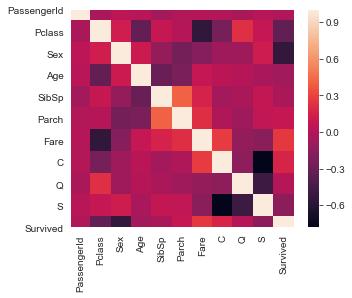

In [52]:
sns.heatmap(df_data.corr())

In [53]:
# for logistic regression we will be drop fare and Pclass because they are highly correlated. also we will drop 
# passengerID
data = df_data.drop(['PassengerId','Fare'], axis=1)

In [54]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,C,Q,S,Survived
0,3,1,22.0,1,0,0,0,1,0
1,1,0,38.0,1,0,1,0,0,1
2,3,0,26.0,0,0,0,0,1,1
3,1,0,35.0,1,0,0,0,1,1
4,3,1,35.0,0,0,0,0,1,0


# Modelling

## Cross Validation

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
Kfold = KFold(n_splits=10, shuffle=True , random_state=20)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.model_selection import GridSearchCV


In [57]:
## Logistic Regression

In [58]:
LR = LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000)
LR.fit(X_train,y_train)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
ypred = LR.predict(X_test.drop(columns=[]))
ypred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
print(cross_val_score(LR, X_train,y_train, cv = 4))

[0.76233184 0.82432432 0.78378378 0.82882883]


In [61]:
print(classification_report(yTest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       266
           1       0.90      0.87      0.89       152

    accuracy                           0.92       418
   macro avg       0.92      0.91      0.91       418
weighted avg       0.92      0.92      0.92       418



In [62]:
print(confusion_matrix(yTest,ypred))

[[252  14]
 [ 20 132]]


### GridSearch for Logistic regression

In [63]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.1,1,5,10,15,20],#'penalty':['l1','l2'],
          'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
         'max_iter':[100,150,200,250,300,350,400,450,500]}
LRgrid = GridSearchCV(estimator=LR, param_grid=params, cv=4)

In [64]:
LRgrid.fit(X_train,y_train)

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reac

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:9

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: C

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarni

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: C

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs 

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: C

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reac

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_ite

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: Conver

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_ite

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: T

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reac

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: C

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LogisticRegression(C=0.1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 5, 10, 15, 20],
                         'max_iter': [100, 150, 200, 250, 300, 350, 400, 450,
                                      500],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', re

In [65]:
print(LRgrid.best_params_)

{'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}


In [66]:
LRgrid.best_score_

0.8008998875140607

## Naive Bayes Gaussian

In [68]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [69]:
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [70]:
NB.score(X_train,y_train)

0.7874015748031497

In [71]:
print(confusion_matrix(yTest,y_NB))

NameError: name 'y_NB' is not defined

In [72]:
y_NB = NB.predict(X_test)

In [73]:
print(classification_report(yTest, y_NB))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       266
           1       0.76      0.93      0.84       152

    accuracy                           0.87       418
   macro avg       0.86      0.88      0.86       418
weighted avg       0.88      0.87      0.87       418



## KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)

In [76]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
knn.score(X_train,y_train)

0.8065241844769404

In [78]:
params = {'n_neighbors':[1,3,5,8,10,15,20,25,30,40,50,70,80,100,120,150], 'algorithm':['auto','ball_tree','kd_tree','brute']}
                                                                                                   
knngrid = GridSearchCV(estimator=knn,param_grid=params, cv=4)

In [79]:
knngrid.fit(X_train,y_train)
print(knngrid.best_score_)
print(knngrid.best_estimator_)

0.6985376827896513
KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


## SVM

In [80]:
from sklearn.svm import SVC

In [81]:
svc = SVC()
svc.fit(XX_train, y_train)

/Users/gamashie/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [82]:
params={'C':[1,2,3,4,5,10,], 'gamma':['scale','auto'], 'kernel':['linear','poly','rbf','sigmoid']}

In [83]:
svcgrid=GridSearchCV(estimator=svc, param_grid=params, cv=4)

In [84]:
# use columnTransformer to standardize Fare and Age columns (Try something NEW)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

transformer = ColumnTransformer(transformers=[('S',StandardScaler(), [2,5])],remainder='passthrough')
Xct = transformer.fit_transform(X_train)
Xct[0:4]

array([[-0.59865836, -0.50023975,  3.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.62354758,  0.78894661,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [-0.29310688, -0.48664993,  3.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.39438396,  0.42286111,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ]])

In [85]:
svcgrid.fit(Xct, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
print(svcgrid.best_estimator_)
print(svcgrid.best_score_)

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8301462317210349


In [87]:
#train the model
svc1 = SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
Xt_test = transformer.fit_transform(X_test)

In [89]:
svc1.fit(Xct, y_train)

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
svc1.score(Xct, y_train)

0.8380202474690663

In [91]:
Ysvc_pred = svc1.predict(Xt_test)
Ysvc_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [92]:

print(cross_val_score(svc1,Xct,y_train, cv = 4))

[0.8206278  0.84234234 0.8018018  0.85585586]


In [93]:
print(confusion_matrix(yTest, Ysvc_pred))
print(classification_report(yTest, Ysvc_pred))

[[264   2]
 [ 20 132]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       266
           1       0.99      0.87      0.92       152

    accuracy                           0.95       418
   macro avg       0.96      0.93      0.94       418
weighted avg       0.95      0.95      0.95       418



In [96]:
#Try out pipeline to predict y
from sklearn.pipeline import Pipeline
pipe = Pipeline([('t', transformer),('model',svc1)])

In [97]:
ypredcompare = pipe.predict(X_test)
ypredcompare[0:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])